## Loan Prediction 

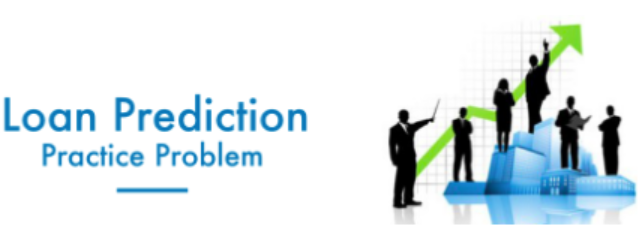

### Import Libraries

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
train = pd.read_csv('Credit_Risk_XTrain.csv')
test = pd.read_csv('Credit_Risk_Test_data.csv')

In [3]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


#### Shape

In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

##### Info

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### Create data feature for understanding which one is  train and test data

In [9]:
train['Data'] = 'Train'
test['Data'] = 'Test'

In [10]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train


In [11]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Data
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Test


##### Merge the both dataset for just to avoid double data preprocessing

In [12]:
df = pd.concat([train , test] , axis = 0)

In [13]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Train


In [14]:
df.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Data
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,Test
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,Test


#### Univariate Analysis

##### 1.Check missing values

In [15]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Data                   0
dtype: int64

#### Insights : Gender , Married , Dependents , self_Employed , LoanAmount , Loan_Amount_Term , Credit_history  have missing values

##### 2. split data into characters and numeric columns

In [16]:
character_columns= ['Gender' ,'Married' ,'Dependents' ,'Education' , 'Self_Employed' , 'Property_Area']
numeric_columns = ['ApplicantIncome' ,'CoapplicantIncome' ,'LoanAmount','Loan_Amount_Term','Credit_History']

##### We are not taking Loan Id feature because its not relevant

In [17]:
df[character_columns].head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural


In [18]:
df[character_columns].head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural


##### 3.Detect Outliers

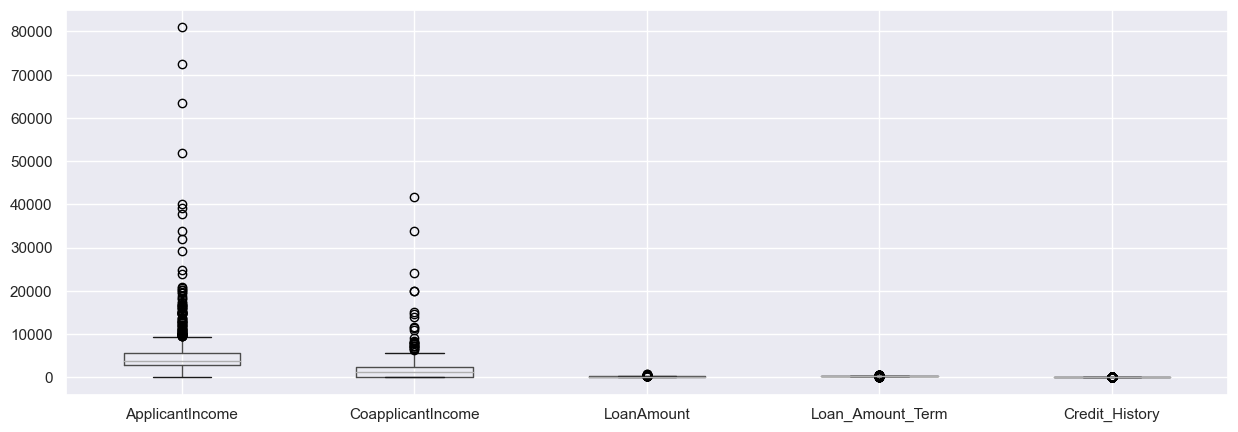

In [19]:
plt.figure(figsize = (15 , 5))
df.boxplot()
plt.show()

#### Insights : we have outliers like Applicantincome , CoapplicantIncome , LoanAmount

### Feature Transformation [Data Preprocessing]

##### 1. Handling Missing values

In [20]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Data                   0
dtype: int64

In [21]:
df.isnull().sum() / len(df) * 100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
Data                  0.000000
dtype: float64

##### Insights : Gender , Married , Dependents , self_Employed , LoanAmount , Loan_Amount_Term , Credit_history

##### We dont take Loan_Status as missing values because this is our dependent variable. so we not treat it

##### Check Describe for checking how is the didtribution of feature

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


##### Check skewness 

In [23]:
df.skew()

ApplicantIncome      7.086961
CoapplicantIncome    6.844109
LoanAmount           2.714036
Loan_Amount_Term    -2.477392
Credit_History      -1.817102
dtype: float64

##### Insights : where we have numeric columns then we can impute by median value only because data is not in normal distribution 

In [24]:
character_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [25]:
numeric_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

##### Handling Missing values of character columns

In [26]:
for col in character_columns[1:]:
    
    df[col].fillna(df[col].mode()[0] , inplace = True)

##### Handling missing values of numerical columns

In [27]:
for col in numeric_columns[:]:
    df[col].fillna(df[col].median() , inplace = True)

##### After Treating missing values

In [28]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Data                   0
dtype: int64

#### 2.Handling The characters

In [29]:
df[character_columns].head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural


In [30]:
df = pd.get_dummies(df , columns = character_columns , drop_first = True)

In [31]:
df.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,Train,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,Train,1,1,1,0,0,0,0,0,0


In [32]:
df.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Data',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

#### Back to your train data only after the most of preprocessing steps

In [33]:
train = df[df['Data'] == 'Train']
test = df[df['Data'] == 'Test'] 

In [34]:
train.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,Train,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,Train,1,1,1,0,0,0,0,0,0


In [35]:
test.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0.0,110.0,360.0,1.0,NaN,Test,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500.0,126.0,360.0,1.0,NaN,Test,1,1,1,0,0,0,0,0,1


In [36]:
train.shape

(614, 17)

In [37]:
test.shape

(367, 17)

##### We split the data into dependent and independent data

In [38]:
train.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,Train,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,Train,1,1,1,0,0,0,0,0,0


In [39]:
x = train.drop(['Loan_ID' , 'Loan_Status' , 'Data'] , axis = 1)
y = train.loc[: , 'Loan_Status']

In [40]:
x.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0


In [41]:
y.head(2)

0    Y
1    N
Name: Loan_Status, dtype: object

In [42]:
test.head(2)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0.0,110.0,360.0,1.0,NaN,Test,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500.0,126.0,360.0,1.0,NaN,Test,1,1,1,0,0,0,0,0,1


##### we dropping the Loan_Status and Data feature for to make data become ready for passing the model for prediction

In [43]:
test.drop(['Loan_ID' , 'Loan_Status' , 'Data'] , axis = 1 , inplace = True)

In [44]:
test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1


###### Now this Test data is ready for prediction. by using that data we make prediction of will get loan or not for stake holders

#### 3.Handling The Outliers are not needed actually  Income might be anything of applicants and co applicants and loan amount also can be anything

##### 4.Feature Scaling

In [45]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.680782,342.410423,0.855049,0.796417,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,6109.041673,2926.248369,84.123205,64.428629,0.352339,0.402991,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,126.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Insights : we will doing feature scaling here the reason is  here lots of variance in data here

##### we will do it here MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [48]:
scaler

MinMaxScaler()

In [49]:
x = scaler.fit_transform(x)

In [50]:
test1 = scaler.transform(test)

In [51]:
pd.DataFrame(x).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.070489,0.000000,0.169320,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
y.head(2)

0    Y
1    N
Name: Loan_Status, dtype: object

#### 5. Data Balance 

In [53]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [54]:
major_class = 422
minor_class = 192

In [55]:
if minor_class * 2 <= major_class:
    
    print('Data Imbalance')
    
else:
    
    print('Data Balance')

Data Imbalance


#### we can be SMOTE or startify also

##### split the train data into train and test

In [56]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [57]:
y = np.where(y == 'Y' , 1 , 0)

In [58]:
pd.DataFrame(y).value_counts()

1    422
0    192
dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 1 , stratify = y )

In [61]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(460, 14) (154, 14) (460,) (154,)


### Building The Model

###### Here we building multiple models and then decide . which one is better and make prediction of test data by that model

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

###### Kernel : Linear

In [63]:
svc_l = SVC( kernel='linear')
svc_l.fit(x_train , y_train)
y_train_pred_l = svc_l.predict(x_train)
y_test_pred_l = svc_l.predict(x_test)

training_accuracy_linear = accuracy_score(y_train , y_train_pred_l)
testing_accuracy_linear = accuracy_score(y_test , y_test_pred_l)

print('Training Accuracy of SVC by Linear :')
print(accuracy_score(y_train , y_train_pred_l))
print('*' * 30)
print('Testing Accuracy of SVC by Linear :' )
print( accuracy_score(y_test , y_test_pred_l))
print('*' * 30)
print('Confusion matrix of training model of svc by linear :')
print(confusion_matrix(y_train , y_train_pred_l))
print('*' * 30)
print('Confusion matrix of testing model of svc by linear :')
print(confusion_matrix(y_test , y_test_pred_l))
print('*' * 30)
print('Classification_report of training model of svc by linear :')
print(classification_report(y_train , y_train_pred_l))
print('*' * 30)
print('Classification_report of testing model of svc by linear :')
print(classification_report(y_test , y_test_pred_l))

Training Accuracy of SVC by Linear :
0.8043478260869565
******************************
Testing Accuracy of SVC by Linear :
0.8246753246753247
******************************
Confusion matrix of training model of svc by linear :
[[ 61  83]
 [  7 309]]
******************************
Confusion matrix of testing model of svc by linear :
[[ 21  27]
 [  0 106]]
******************************
Classification_report of training model of svc by linear :
              precision    recall  f1-score   support

           0       0.90      0.42      0.58       144
           1       0.79      0.98      0.87       316

    accuracy                           0.80       460
   macro avg       0.84      0.70      0.72       460
weighted avg       0.82      0.80      0.78       460

******************************
Classification_report of testing model of svc by linear :
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        48
           1       0.80     

###### kernel : Sigmoid

In [64]:
svc_s = SVC( kernel='sigmoid')
svc_s.fit(x_train , y_train)
y_train_pred_s = svc_s.predict(x_train)
y_test_pred_s = svc_s.predict(x_test)

training_accuracy_sigmoid = accuracy_score(y_train , y_train_pred_s)
testing_accuracy_sigmoid = accuracy_score(y_test , y_test_pred_s)


print('Training Accuracy of SVC by sigmoid :')
print(accuracy_score(y_train , y_train_pred_s))
print('*' * 30)
print('Testing Accuracy of SVC by sigmoid :' )
print( accuracy_score(y_test , y_test_pred_s))
print('*' * 30)
print('Confusion matrix of training model of svc by sigmoid :')
print(confusion_matrix(y_train , y_train_pred_s))
print('*' * 30)
print('Confusion matrix of testing model of svc by sigmoid :')
print(confusion_matrix(y_test , y_test_pred_s))
print('*' * 30)
print('Classification_report of training model of svc by sigmoid :')
print(classification_report(y_train , y_train_pred_s))
print('*' * 30)
print('Classification_report of testing model of svc by sigmoid :')
print(classification_report(y_test , y_test_pred_s))

Training Accuracy of SVC by sigmoid :
0.6086956521739131
******************************
Testing Accuracy of SVC by sigmoid :
0.6688311688311688
******************************
Confusion matrix of training model of svc by sigmoid :
[[ 36 108]
 [ 72 244]]
******************************
Confusion matrix of testing model of svc by sigmoid :
[[10 38]
 [13 93]]
******************************
Classification_report of training model of svc by sigmoid :
              precision    recall  f1-score   support

           0       0.33      0.25      0.29       144
           1       0.69      0.77      0.73       316

    accuracy                           0.61       460
   macro avg       0.51      0.51      0.51       460
weighted avg       0.58      0.61      0.59       460

******************************
Classification_report of testing model of svc by sigmoid :
              precision    recall  f1-score   support

           0       0.43      0.21      0.28        48
           1       0.71   

###### kernel : polynomial

In [65]:
svc_p = SVC( kernel='poly')
svc_p.fit(x_train , y_train)
y_train_pred_p = svc_p.predict(x_train)
y_test_pred_p = svc_p.predict(x_test)

training_accuracy_poly = accuracy_score(y_train , y_train_pred_p)
testing_accuracy_poly = accuracy_score(y_test , y_test_pred_p)





print('Training Accuracy of SVC by poynomial :')
print(accuracy_score(y_train , y_train_pred_p))
print('*' * 30)
print('Testing Accuracy of SVC by polynomial :' )
print( accuracy_score(y_test , y_test_pred_p))
print('*' * 30)
print('Confusion matrix of training model of svc by polynomial :')
print(confusion_matrix(y_train , y_train_pred_p))
print('*' * 30)
print('Confusion matrix of testing model of svc by polynomial :')
print(confusion_matrix(y_test , y_test_pred_p))
print('*' * 30)
print('Classification_report of training model of svc by polynomial :')
print(classification_report(y_train , y_train_pred_p))
print('*' * 30)
print('Classification_report of testing model of svc by polynomial :')
print(classification_report(y_test , y_test_pred_p))

Training Accuracy of SVC by poynomial :
0.8173913043478261
******************************
Testing Accuracy of SVC by polynomial :
0.8181818181818182
******************************
Confusion matrix of training model of svc by polynomial :
[[ 66  78]
 [  6 310]]
******************************
Confusion matrix of testing model of svc by polynomial :
[[ 21  27]
 [  1 105]]
******************************
Classification_report of training model of svc by polynomial :
              precision    recall  f1-score   support

           0       0.92      0.46      0.61       144
           1       0.80      0.98      0.88       316

    accuracy                           0.82       460
   macro avg       0.86      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

******************************
Classification_report of testing model of svc by polynomial :
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        48
     

###### kernel : rbf

In [66]:
svc_r = SVC( kernel='rbf')
svc_r.fit(x_train , y_train)
y_train_pred_r = svc_r.predict(x_train)
y_test_pred_r = svc_r.predict(x_test)

training_accuracy_rbf = accuracy_score(y_train , y_train_pred_r)
testing_accuracy_rbf = accuracy_score(y_test , y_test_pred_r)


print('Training Accuracy of SVC by rbf :')
print(accuracy_score(y_train , y_train_pred_r))
print('*' * 30)
print('Testing Accuracy of SVC by rbf :' )
print( accuracy_score(y_test , y_test_pred_r))
print('*' * 30)
print('Confusion matrix of training model of svc by rbf :')
print(confusion_matrix(y_train , y_train_pred_r))
print('*' * 30)
print('Confusion matrix of testing model of svc by rbf :')
print(confusion_matrix(y_test , y_test_pred_r))
print('*' * 30)
print('Classification_report of training model of svc by rbf :')
print(classification_report(y_train , y_train_pred_r))
print('*' * 30)
print('Classification_report of testing model of svc by rbf :')
print(classification_report(y_test , y_test_pred_r))

Training Accuracy of SVC by rbf :
0.8043478260869565
******************************
Testing Accuracy of SVC by rbf :
0.8246753246753247
******************************
Confusion matrix of training model of svc by rbf :
[[ 61  83]
 [  7 309]]
******************************
Confusion matrix of testing model of svc by rbf :
[[ 21  27]
 [  0 106]]
******************************
Classification_report of training model of svc by rbf :
              precision    recall  f1-score   support

           0       0.90      0.42      0.58       144
           1       0.79      0.98      0.87       316

    accuracy                           0.80       460
   macro avg       0.84      0.70      0.72       460
weighted avg       0.82      0.80      0.78       460

******************************
Classification_report of testing model of svc by rbf :
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        48
           1       0.80      1.00      0.89   

##### Naive Bayes  Theorem

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [68]:
gnb = GaussianNB()
gnb.fit(x_train , y_train)
y_train_pred_gnb = gnb.predict(x_train)
y_test_pred_gnb = gnb.predict(x_test)

training_accuracy_gnb = accuracy_score(y_train , y_train_pred_gnb)
testing_accuracy_gnb = accuracy_score(y_test , y_test_pred_gnb)


print('Training Accuracy of gnb :')
print(accuracy_score(y_train , y_train_pred_gnb))
print('*' * 30)
print('Testing Accuracy of gnb :' )
print( accuracy_score(y_test , y_test_pred_gnb))
print('*' * 30)
print('Confusion matrix of training model of gnb :')
print(confusion_matrix(y_train , y_train_pred_gnb))
print('*' * 30)
print('Confusion matrix of testing model of svc by gnb :')
print(confusion_matrix(y_train , y_train_pred_gnb))
print('*' * 30)
print('Classification_report of training model of svc by gnb :')
print(classification_report(y_train , y_train_pred_gnb))
print('*' * 30)
print('Classification_report of testing model of svc by gnb :')
print(classification_report(y_test , y_test_pred_gnb))

Training Accuracy of gnb :
0.7978260869565217
******************************
Testing Accuracy of gnb :
0.8181818181818182
******************************
Confusion matrix of training model of gnb :
[[ 65  79]
 [ 14 302]]
******************************
Confusion matrix of testing model of svc by gnb :
[[ 65  79]
 [ 14 302]]
******************************
Classification_report of training model of svc by gnb :
              precision    recall  f1-score   support

           0       0.82      0.45      0.58       144
           1       0.79      0.96      0.87       316

    accuracy                           0.80       460
   macro avg       0.81      0.70      0.72       460
weighted avg       0.80      0.80      0.78       460

******************************
Classification_report of testing model of svc by gnb :
              precision    recall  f1-score   support

           0       0.88      0.48      0.62        48
           1       0.80      0.97      0.88       106

    accuracy

In [69]:
bnb = BernoulliNB()
bnb.fit(x_train , y_train)
y_train_pred_bnb = bnb.predict(x_train)
y_test_pred_bnb = bnb.predict(x_test)

training_accuracy_bnb = accuracy_score(y_train , y_train_pred_bnb)
testing_accuracy_bnb = accuracy_score(y_test , y_test_pred_bnb)


print('Training Accuracy of bnb :')
print(accuracy_score(y_train , y_train_pred_bnb))
print('*' * 30)
print('Testing Accuracy of bnb :' )
print( accuracy_score(y_test , y_test_pred_bnb))
print('*' * 30)
print('Confusion matrix of training model of bnb :')
print(confusion_matrix(y_train , y_train_pred_bnb))
print('*' * 30)
print('Confusion matrix of testing model of bnb :')
print(confusion_matrix(y_train , y_train_pred_bnb))
print('*' * 30)
print('Classification_report of training model of bnb :')
print(classification_report(y_train , y_train_pred_bnb))
print('*' * 30)
print('Classification_report of testing model of bnb :')
print(classification_report(y_test , y_test_pred_bnb))

Training Accuracy of bnb :
0.8021739130434783
******************************
Testing Accuracy of bnb :
0.8311688311688312
******************************
Confusion matrix of training model of bnb :
[[ 62  82]
 [  9 307]]
******************************
Confusion matrix of testing model of bnb :
[[ 62  82]
 [  9 307]]
******************************
Classification_report of training model of bnb :
              precision    recall  f1-score   support

           0       0.87      0.43      0.58       144
           1       0.79      0.97      0.87       316

    accuracy                           0.80       460
   macro avg       0.83      0.70      0.72       460
weighted avg       0.82      0.80      0.78       460

******************************
Classification_report of testing model of bnb :
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        48
           1       0.80      1.00      0.89       106

    accuracy                     

#### Barplot

In [70]:
list1 = ['SVM_Linear' , 'SVM_Sigmoid' , 'SVM_poly' , 'SVM_rbf' , 'naive_bayes_gaussian' , 'naive_bayes_berboulli']

In [71]:
list2 = [training_accuracy_linear , training_accuracy_sigmoid , training_accuracy_poly , training_accuracy_rbf , training_accuracy_gnb , training_accuracy_bnb]

In [72]:
list3 = [testing_accuracy_linear , testing_accuracy_sigmoid , testing_accuracy_poly , testing_accuracy_rbf  ,testing_accuracy_gnb , testing_accuracy_bnb]

##### Crate DataFrame

In [73]:
accuracy_df = pd.DataFrame({'Methods' :list1 , 'Training Accuracy' : list2 , 'Testing Accuracy' : list3 })

In [74]:
accuracy_df

,Methods,Training Accuracy,Testing Accuracy
0,SVM_Linear,0.804348,0.824675
1,SVM_Sigmoid,0.608696,0.668831
2,SVM_poly,0.817391,0.818182
3,SVM_rbf,0.804348,0.824675
4,naive_bayes_gaussian,0.797826,0.818182
5,naive_bayes_berboulli,0.802174,0.831169


In [75]:
Training_accuracy_df = pd.DataFrame({'Methods' :list1 , 'Training Accuracy' : list2})

In [76]:
Training_accuracy_df

,Methods,Training Accuracy
0,SVM_Linear,0.804348
1,SVM_Sigmoid,0.608696
2,SVM_poly,0.817391
3,SVM_rbf,0.804348
4,naive_bayes_gaussian,0.797826
5,naive_bayes_berboulli,0.802174


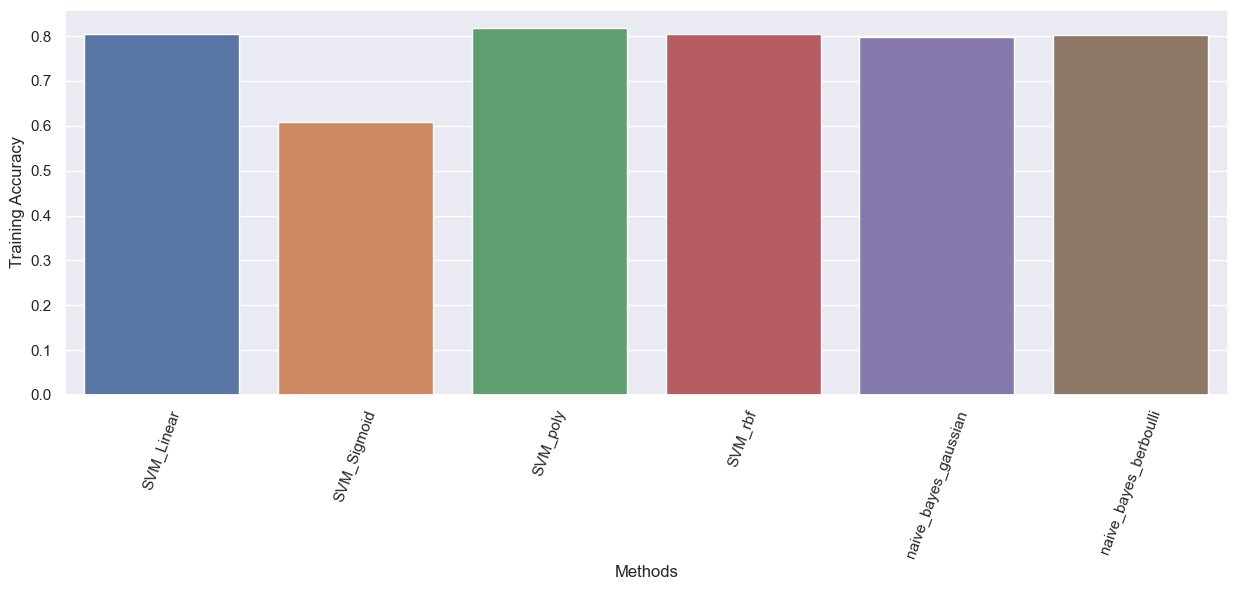

In [77]:
plt.figure(figsize = (15 , 5))
chart = sns.barplot(x = 'Methods' , y = 'Training Accuracy' , data = Training_accuracy_df)
chart.set_xticklabels(chart.get_xticklabels() , rotation= 70)
plt.show()

In [78]:
Testing_accuracy_df = pd.DataFrame({'Methods' :list1 , 'Testing Accuracy' : list3})

In [79]:
Testing_accuracy_df

,Methods,Testing Accuracy
0,SVM_Linear,0.824675
1,SVM_Sigmoid,0.668831
2,SVM_poly,0.818182
3,SVM_rbf,0.824675
4,naive_bayes_gaussian,0.818182
5,naive_bayes_berboulli,0.831169


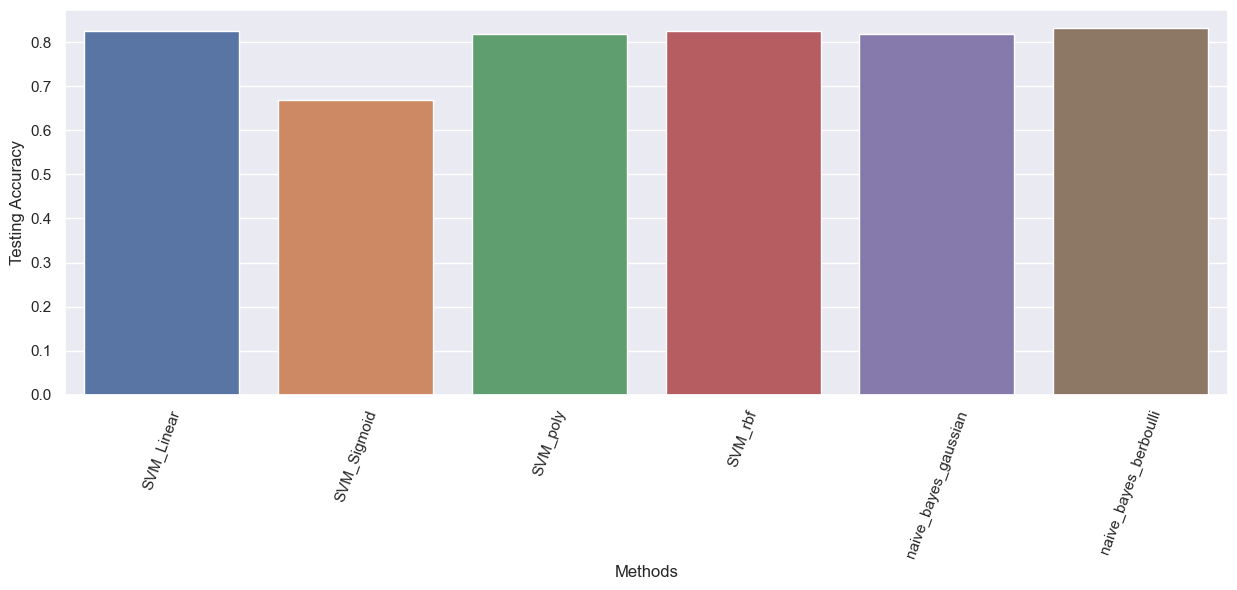

In [80]:
plt.figure(figsize = (15 , 5))
chart = sns.barplot(x = 'Methods' , y = 'Testing Accuracy' , data = Testing_accuracy_df)
chart.set_xticklabels ( chart.get_xticklabels() , rotation = 70)
#print(chart)
plt.show()

#### Here we select rbf model fot prediction on new test data

In [81]:
svc_r

SVC()

##### Prediction on test data by support vector rbf kernel

In [82]:
test_pred = svc_r.predict(test1)

In [83]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [84]:
print(test_pred.shape)
print(test.shape)

(367,)
(367, 14)


##### Yes we have same shape means we are correct

##### concate for to just export file

In [85]:
test = pd.DataFrame(test)

In [86]:
test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1


In [87]:
test_pred = pd.DataFrame(data = test_pred , columns = ['loan_status_test'])

In [88]:
test_pred.head(2)

,loan_status_test
0,1
1,1


In [89]:
credit_risk_test_client = pd.concat([test , test_pred] , axis = 1)

In [90]:
credit_risk_test_client

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,loan_status_test
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
2,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
3,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
4,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,1
363,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
364,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,1
365,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


##### Export the credit_risk_test_client

In [91]:
credit_risk_test_client.to_csv('C:\\Users\\Lenovo\\Desktop\\credit_risk_test_client.csv')

##### Yes we can Handover to client

### RandomForest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(n_estimators=1000)

In [94]:
rf

RandomForestClassifier(n_estimators=1000)

In [95]:
rf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=1000)

In [96]:
y_train_pred_rf = rf.predict(x_train)

###### Training and Testing accuracy by  rf

In [97]:
print(accuracy_score(y_train , y_train_pred_rf))

1.0


In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
cv_rf = cross_val_score(rf , x_train , y_train , cv = 10)

In [100]:
cv_rf

array([0.80434783, 0.80434783, 0.7826087 , 0.73913043, 0.80434783,
       0.7826087 , 0.80434783, 0.76086957, 0.84782609, 0.7826087 ])

In [101]:
cv_rf.mean()

0.7913043478260869

In [102]:
training_accuracy_rf = cv_rf.mean()

In [103]:
training_accuracy_rf

0.7913043478260869

In [104]:
y_test_pred_rf = rf.predict(x_test)

In [105]:
y_test_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
testing_accuracy_rf = accuracy_score(y_test , y_test_pred_rf)

In [107]:
testing_accuracy_rf 

0.8116883116883117

##### Prediction on test data by dt

In [108]:
final_output_rf = rf.predict(test1)

In [109]:
final_output_rf

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dt = DecisionTreeClassifier()

In [112]:
dt

DecisionTreeClassifier()

In [113]:
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [114]:
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

In [115]:
training_accuracy_dt = accuracy_score(y_train , y_train_pred_dt)

In [116]:
training_accuracy_dt

1.0

In [117]:
cv_dt = cross_val_score(dt , x_train , y_train , cv = 10)

In [118]:
cv_dt

array([0.65217391, 0.76086957, 0.69565217, 0.69565217, 0.80434783,
       0.63043478, 0.69565217, 0.7173913 , 0.76086957, 0.69565217])

In [119]:
training_accuracy_dt  = cv_dt.mean()

In [120]:
training_accuracy_dt 

0.7108695652173914

In [121]:
y_test_pred_dt = dt.predict(x_test)

In [122]:
y_test_pred_dt

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [123]:
testing_accuracy_dt = accuracy_score(y_test ,y_test_pred_dt)

In [124]:
testing_accuracy_dt

0.7597402597402597

##### Prediction of test data by DT

In [125]:
final_output_dt = dt.predict(test1)

In [126]:
final_output_dt

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,

### BaggingClassifier

In [128]:
from sklearn.ensemble import BaggingClassifier

In [129]:
bgg = BaggingClassifier()

In [130]:
bgg

BaggingClassifier()

In [131]:
bgg.fit(x_train , y_train)

BaggingClassifier()

In [132]:
y_train_pred_bgg = bgg.predict(x_train)
y_test_pred_bgg = bgg.predict(x_test)

In [133]:
Training_accuracy_bagging = accuracy_score(y_train , y_train_pred_bgg)

In [134]:
Training_accuracy_bagging 

0.9956521739130435

In [135]:
Testing_accuracy_bagging = accuracy_score(y_test , y_test_pred_bgg)

In [136]:
Testing_accuracy_bagging

0.7337662337662337

In [137]:
print(Training_accuracy_bagging )
print(Testing_accuracy_bagging)

0.9956521739130435
0.7337662337662337


#### Here model get get overfitted because we have variance more than 10 %

In [138]:
cv_bgg = cross_val_score(bgg , x_train , y_train , cv = 10)

In [139]:
cv_bgg

array([0.80434783, 0.69565217, 0.7173913 , 0.73913043, 0.7826087 ,
       0.73913043, 0.76086957, 0.76086957, 0.7826087 , 0.73913043])

In [140]:
training_accuracy_bagging = cv_bgg.mean()

In [141]:
training_accuracy_bagging

0.7521739130434782

In [163]:
Testing_accuracy_bagging 

0.7337662337662337

In [164]:
print(confusion_matrix(y_train , y_train_pred_bgg))
print('*'*30)
print(confusion_matrix(y_test , y_test_pred_bgg))
print('*'*30)
print(classification_report(y_train , y_train_pred_bgg))
print('*'*30)
print(classification_report(y_test , y_test_pred_bgg))

[[142   2]
 [  0 316]]
******************************
[[24 24]
 [17 89]]
******************************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       144
           1       0.99      1.00      1.00       316

    accuracy                           1.00       460
   macro avg       1.00      0.99      0.99       460
weighted avg       1.00      1.00      1.00       460

******************************
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        48
           1       0.79      0.84      0.81       106

    accuracy                           0.73       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.72      0.73      0.73       154



### xgboost

In [165]:
from xgboost import XGBClassifier

In [166]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

Training_accuracy_xgb = accuracy_score(y_train , y_train_pred_xgb)
Testing_accuracy_xgb = accuracy_score(y_test , y_test_pred_xgb)


print('Training Accuracy of xgb :' , Training_accuracy_xgb)
print('*'*40)
print('Testing Accuracy of xgb :' , Testing_accuracy_xgb)
print('*'*40)


print(confusion_matrix(y_train , y_train_pred_xgb))
print('*'*40)
print(confusion_matrix(y_test , y_test_pred_xgb ))
print('*'*40)


print(classification_report(y_train , y_train_pred_xgb))
print('*'*40)
print(classification_report(y_test , y_test_pred_xgb))
print('*'*40)


cv_xgb =cross_val_score(xgb , x_train , y_train , cv = 10)
updated_training_accuracy_xgb = cv_xgb.mean()

print('updated_training_accuracy_xgb :' , updated_training_accuracy_xgb )


Training Accuracy of xgb : 1.0
****************************************
Testing Accuracy of xgb : 0.7727272727272727
****************************************
[[144   0]
 [  0 316]]
****************************************
[[24 24]
 [11 95]]
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       316

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

****************************************
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        48
           1       0.80      0.90      0.84       106

    accuracy                           0.77       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154

***********************

In [167]:
from sklearn.ensemble import BaggingClassifier

In [168]:
bg = RandomForestClassifier()
bg.fit(x_train , y_train)
y_train_pred_bg = bg.predict(x_train)
y_test_pred_bg = bg.predict(x_test)

training_accuracy_bg = accuracy_score(y_train , y_train_pred_bg)
testing_accuracy_bg = accuracy_score(y_test , y_test_pred_bg)


print('Training Accuracy of bg :')
print(accuracy_score(y_train , y_train_pred_bg))
print('*' * 30)
print('Testing Accuracy of bg :' )
print( accuracy_score(y_test , y_test_pred_bg))
print('*' * 30)
print('Confusion matrix of training model of bg :')
print(confusion_matrix(y_train , y_train_pred_bnb))
print('*' * 30)
print('Confusion matrix of testing model of bnb :')
print(confusion_matrix(y_train , y_train_pred_bg))
print('*' * 30)
print('Classification_report of training model of bg :')
print(classification_report(y_train , y_train_pred_bg))
print('*' * 30)
print('Classification_report of testing model of bg :')
print(classification_report(y_test , y_test_pred_bg))

Training Accuracy of bg :
1.0
******************************
Testing Accuracy of bg :
0.8246753246753247
******************************
Confusion matrix of training model of bg :
[[ 62  82]
 [  9 307]]
******************************
Confusion matrix of testing model of bnb :
[[144   0]
 [  0 316]]
******************************
Classification_report of training model of bg :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       316

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

******************************
Classification_report of testing model of bg :
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        48
           1       0.81      0.97      0.88       106

    accuracy                           0.82       154

# PCA : Principal Component Analysis
##### It use for Diamension reduction

In [169]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(460, 14) (154, 14) (460,) (154,)


##### We are checking all 14 are significant or not ?

In [170]:
from sklearn.decomposition import PCA

#### First of all we considering all variables 

In [171]:
pca = PCA(n_components=None)

##### Insights : we taking all variables so thats why we took n_components as None

In [172]:
pca

PCA()

###### Fit and transform of x_train and x_test data

In [173]:
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)

In [174]:
pd.DataFrame(x_train).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.023055,0.046296,0.094067,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.044106,0.000000,0.047757,0.358974,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
pd.DataFrame(x_train_n).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.567982,0.698610,-0.234846,-0.046345,-0.232159,-0.338172,-0.093005,-0.192967,-0.365990,-0.023805,0.003439,-0.094666,0.007393,0.004701
1,-0.122608,-0.317437,-0.113200,-0.023036,-0.337963,-0.181149,-0.266526,0.125656,0.383795,-0.192549,0.379882,-0.058495,-0.065873,0.014225


##### Insights : we noticed it values are changes by pca in x_train_n (by comparing x_train). PCA doing this thing internaly so we can not say pca will take this perticular feature as significance variable . It not taking variable only it take value also.

In [176]:
pd.DataFrame(x_test).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.069215,0.0,0.356006,0.74359,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.040198,0.0,0.124457,0.74359,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [177]:
pd.DataFrame(x_test_n).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.546613,-0.588061,-0.338287,-0.105092,0.032357,-0.160175,0.121641,-0.367970,0.074409,-0.213279,0.087343,-0.059951,-0.023539,-0.095243
1,0.385476,0.670168,0.959694,0.361728,0.077823,0.136242,-0.439158,-0.163979,-0.060954,0.019084,-0.017013,-0.045473,0.018431,0.011812


##### Insights : we noticed it values are changes by pca in x_test_n (by comparing x_test). PCA doing this thing internaly so we can not say pca will take this perticular feature as significance variable . It not taking variable only it take value also.

##### Calculate explained variance ratio

In [178]:
variance_ratio = pca.explained_variance_ratio_

In [179]:
variance_ratio

array([0.23257724, 0.17749851, 0.12928663, 0.09689036, 0.0795426 ,
       0.06702157, 0.06415096, 0.05947531, 0.04269268, 0.02957949,
       0.01014595, 0.00694346, 0.00305294, 0.0011423 ])

In [180]:
sum(variance_ratio)

1.0000000000000002

##### It gives variance ratio of each and every column

#### Now we take only those variable who give us 95 % information because this whole reaches me to 100 %

In [181]:
sum([0.23257724, 0.17749851, 0.12928663, 0.09689036, 0.0795426 ,
       0.06702157, 0.06415096, 0.05947531, 0.04269268])

0.9491358599999999

##### Insights : we take 9 variables who give us 95 % information . but don't aware about this variables which one is taking by pca. It complete black box.

#### First variable always give max info

#### SVM before applying the PCA

In [182]:
svc_r = SVC( kernel='rbf')
svc_r.fit(x_train , y_train)
y_train_pred_r = svc_r.predict(x_train)
y_test_pred_r = svc_r.predict(x_test)

training_accuracy_rbf = accuracy_score(y_train , y_train_pred_r)
testing_accuracy_rbf = accuracy_score(y_test , y_test_pred_r)

print('training_accuracy_rbf :' , training_accuracy_rbf)
print('training_accuracy_rbf :' ,testing_accuracy_rbf)

training_accuracy_rbf : 0.8043478260869565
training_accuracy_rbf : 0.8246753246753247


## Now we again building PCA by taking 9 variables only

In [183]:
pca_9 = PCA(n_components = 9)

In [184]:
pca_9

PCA(n_components=9)

#### fit and transform x train and x test data of  pca for 9 features

In [185]:
x_train_9 = pca_9.fit_transform(x_train)
x_test_9 = pca_9.fit_transform(x_test)

### we apply pca on SVM means we pass those x_train and y_train data where pca get applied

In [186]:
svc_r = SVC( kernel='rbf')
svc_r.fit(x_train_9 , y_train)
y_train_pred_r_pca = svc_r.predict(x_train_9)
y_test_pred_r_pca = svc_r.predict(x_test_9)

training_accuracy_rbf_by_pca = accuracy_score(y_train , y_train_pred_r_pca)
testing_accuracy_rbf_by_pca = accuracy_score(y_test , y_test_pred_r_pca)

print('training_accuracy_rbf_by_pca :' , training_accuracy_rbf_by_pca)
print('training_accuracy_rbf_by_pca :' ,testing_accuracy_rbf_by_pca)

training_accuracy_rbf_by_pca : 0.8065217391304348
training_accuracy_rbf_by_pca : 0.6558441558441559


#### Here is no need to apply pca here . beacause it make our performance poor

In [187]:
print('svm accuracy before the pca is :')
print()
print('training_accuracy_rbf :' , training_accuracy_rbf)
print('training_accuracy_rbf :' ,testing_accuracy_rbf)
print()
print('*****'* 20)
print()
print('svm accuracy after the pca is :')
print()
print('training_accuracy_rbf_by_pca :' , training_accuracy_rbf_by_pca)
print('training_accuracy_rbf_by_pca :' ,testing_accuracy_rbf_by_pca)

svm accuracy before the pca is :

training_accuracy_rbf : 0.8043478260869565
training_accuracy_rbf : 0.8246753246753247

****************************************************************************************************

svm accuracy after the pca is :

training_accuracy_rbf_by_pca : 0.8065217391304348
training_accuracy_rbf_by_pca : 0.6558441558441559


##### Insights : PCA make our model poor because it reduces testing accuracy as well it make model become overfit